https://www.analyticsvidhya.com/blog/2017/07/introduction-to-genetic-algorithm/

http://hjemmesider.diku.dk/~pisinger/codes.html

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import random

import numpy as np
import pandas as pd
from evol import Evolution, Population

import cufflinks as cf
from genetic_algorithms.utils import MyLogger

cf.go_offline()

In [3]:
from genetic_algorithms.examples.knapsack import Knapsack

In [4]:
k1 = Knapsack.from_literature()

In [5]:
optimal_solution = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [6]:
logger = MyLogger()
pop = Population(
    chromosomes=k1.get_solutions(200),
    eval_function=k1.fitness,
    maximize=True,
)
evo1 = (
    Evolution()
    .survive(fraction=0.2)
    .breed(parent_picker=k1.select, combiner=k1.crossover)
    #.mutate(mutate_function=mutate, sigma=1)
    #.evaluate()
    .callback(logger.log)
)
pop.evolve(evo1, n=100)

<Population with size 200 at 2159689771104>

In [7]:
pop.evaluate()

<Population with size 200 at 2159688892144>

In [101]:
pop.current_best.chromosome

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1])

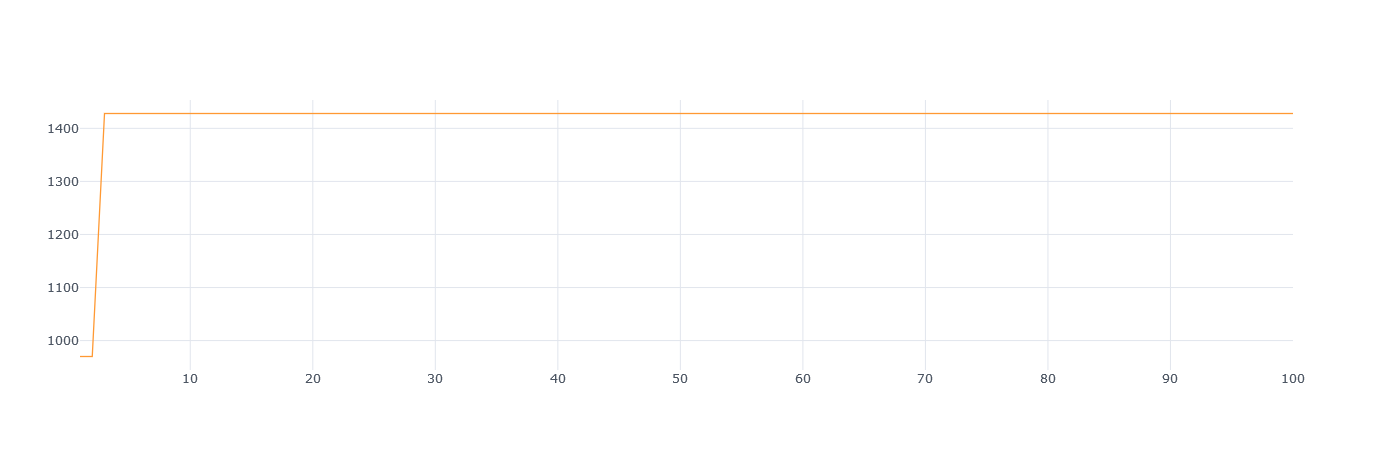

In [105]:
pd.DataFrame(logger.individuals_by_generation).groupby("generation").agg("max").iplot(kind="scatter", y="individual_fitness")